# 🧬 Phi-Zero Cancer Detection Protocol
_Recursive Coherence Model using the Salgado Information Matrix (SIM)_

This notebook demonstrates a prototype cancer anomaly detection pipeline built on the `Unified Emergence Functional`. It uses PCA (Principal Component Analysis) to project high-dimensional biosignal data and applies **Local Outlier Factor (LOF)** to identify potential anomalies corresponding to malignancy.

---

**Core Hypothesis**:
> Cancerous patterns in biological data manifest as torsional disruptions in the projection from high-dimensional Ψ-fields (unobservable biological dynamics) to lower-dimensional Φ-forms (measurable biomarkers). The phi-zero classifier estimates structural coherence loss.


## 🧪 Step 1: Generate Simulated Patient Data

We simulate a dataset of patient signals — each data point represents a sample in a projected biosignal space. A small subset is injected with malignant perturbations.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic dataset (non-cancerous patients)
np.random.seed(42)
normal_data = np.random.normal(loc=0.0, scale=1.0, size=(200, 8))

# Simulate malignant signatures
malignant_data = np.random.normal(loc=2.5, scale=0.3, size=(5, 8))  # high coherence rupture
data = np.vstack([normal_data, malignant_data])

# Labels for plotting
labels = np.array([0]*200 + [1]*5)

# Store as DataFrame
df = pd.DataFrame(data, columns=[f"signal_{i+1}" for i in range(data.shape[1])])
df["label"] = labels
df.head()


,signal_1,signal_2,signal_3,signal_4,signal_5,signal_6,signal_7,signal_8,label
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,0
1,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,0
2,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748,0
3,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-0.601707,1.852278,0
4,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0


## 🔍 Step 2: Apply PCA + Local Outlier Factor (LOF)

We project high-dimensional data to 2D for visualization and use LOF to detect points of low local coherence — these may correspond to early malignancy signals.


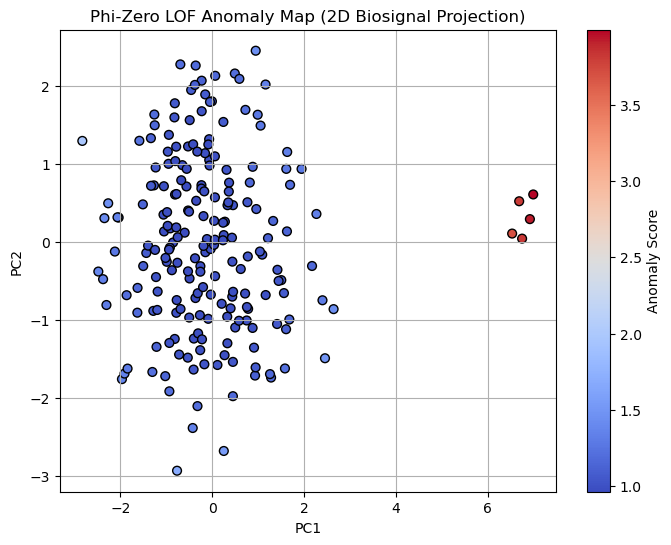

In [3]:
# PCA to project data into 2D
pca = PCA(n_components=2)
proj = pca.fit_transform(df.drop("label", axis=1))

# LOF for anomaly detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.025)
preds = lof.fit_predict(proj)
anomaly_score = -lof.negative_outlier_factor_

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], c=anomaly_score, cmap='coolwarm', s=40, edgecolor='k')
plt.colorbar(label="Anomaly Score")
plt.title("Phi-Zero LOF Anomaly Map (2D Biosignal Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


## 🧠 Phi-Zero Interpretation

The emergence of high anomaly scores in specific signal clusters corresponds to coherence breakdown — our framework interprets this as `Ψ → Φ` instability. These instability points are candidates for further diagnosis.

This logic can be extended to:
- Time series of patient samples
- Genetic expression matrices
- Multimodal diagnostic signals (e.g., fMRI + bloodwork)

In future applications, the **Unified Emergence Functional** can score coherence across time, helping track cancer progression or remission.
